# Import And Install Necessary Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# Load the Dataset

In [3]:
car=pd.read_csv('CO2 Emissions_Canada.csv')

# Understand And Organize the Dataset

In [5]:
car.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
car.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [11]:
car.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

### Edit column names for better understanding of features and easy operation

In [13]:
car.columns=car.columns.str.replace(" (L/100 km)","")
car.columns=car.columns.str.replace("(L)","")
car.columns=car.columns.str.replace("(g/km)","")
car.columns=car.columns.str.replace(" ","_")
car.columns=car.columns.str.lower()

In [15]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         7385 non-null   object 
 1   model                        7385 non-null   object 
 2   vehicle_class                7385 non-null   object 
 3   engine_size                  7385 non-null   float64
 4   cylinders                    7385 non-null   int64  
 5   transmission                 7385 non-null   object 
 6   fuel_type                    7385 non-null   object 
 7   fuel_consumption_city        7385 non-null   float64
 8   fuel_consumption_hwy         7385 non-null   float64
 9   fuel_consumption_comb        7385 non-null   float64
 10  fuel_consumption_comb_(mpg)  7385 non-null   int64  
 11  co2_emissions                7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


# EDA (Exploratory Data Analysis)

## Distribution Analysis of Categorical Variables

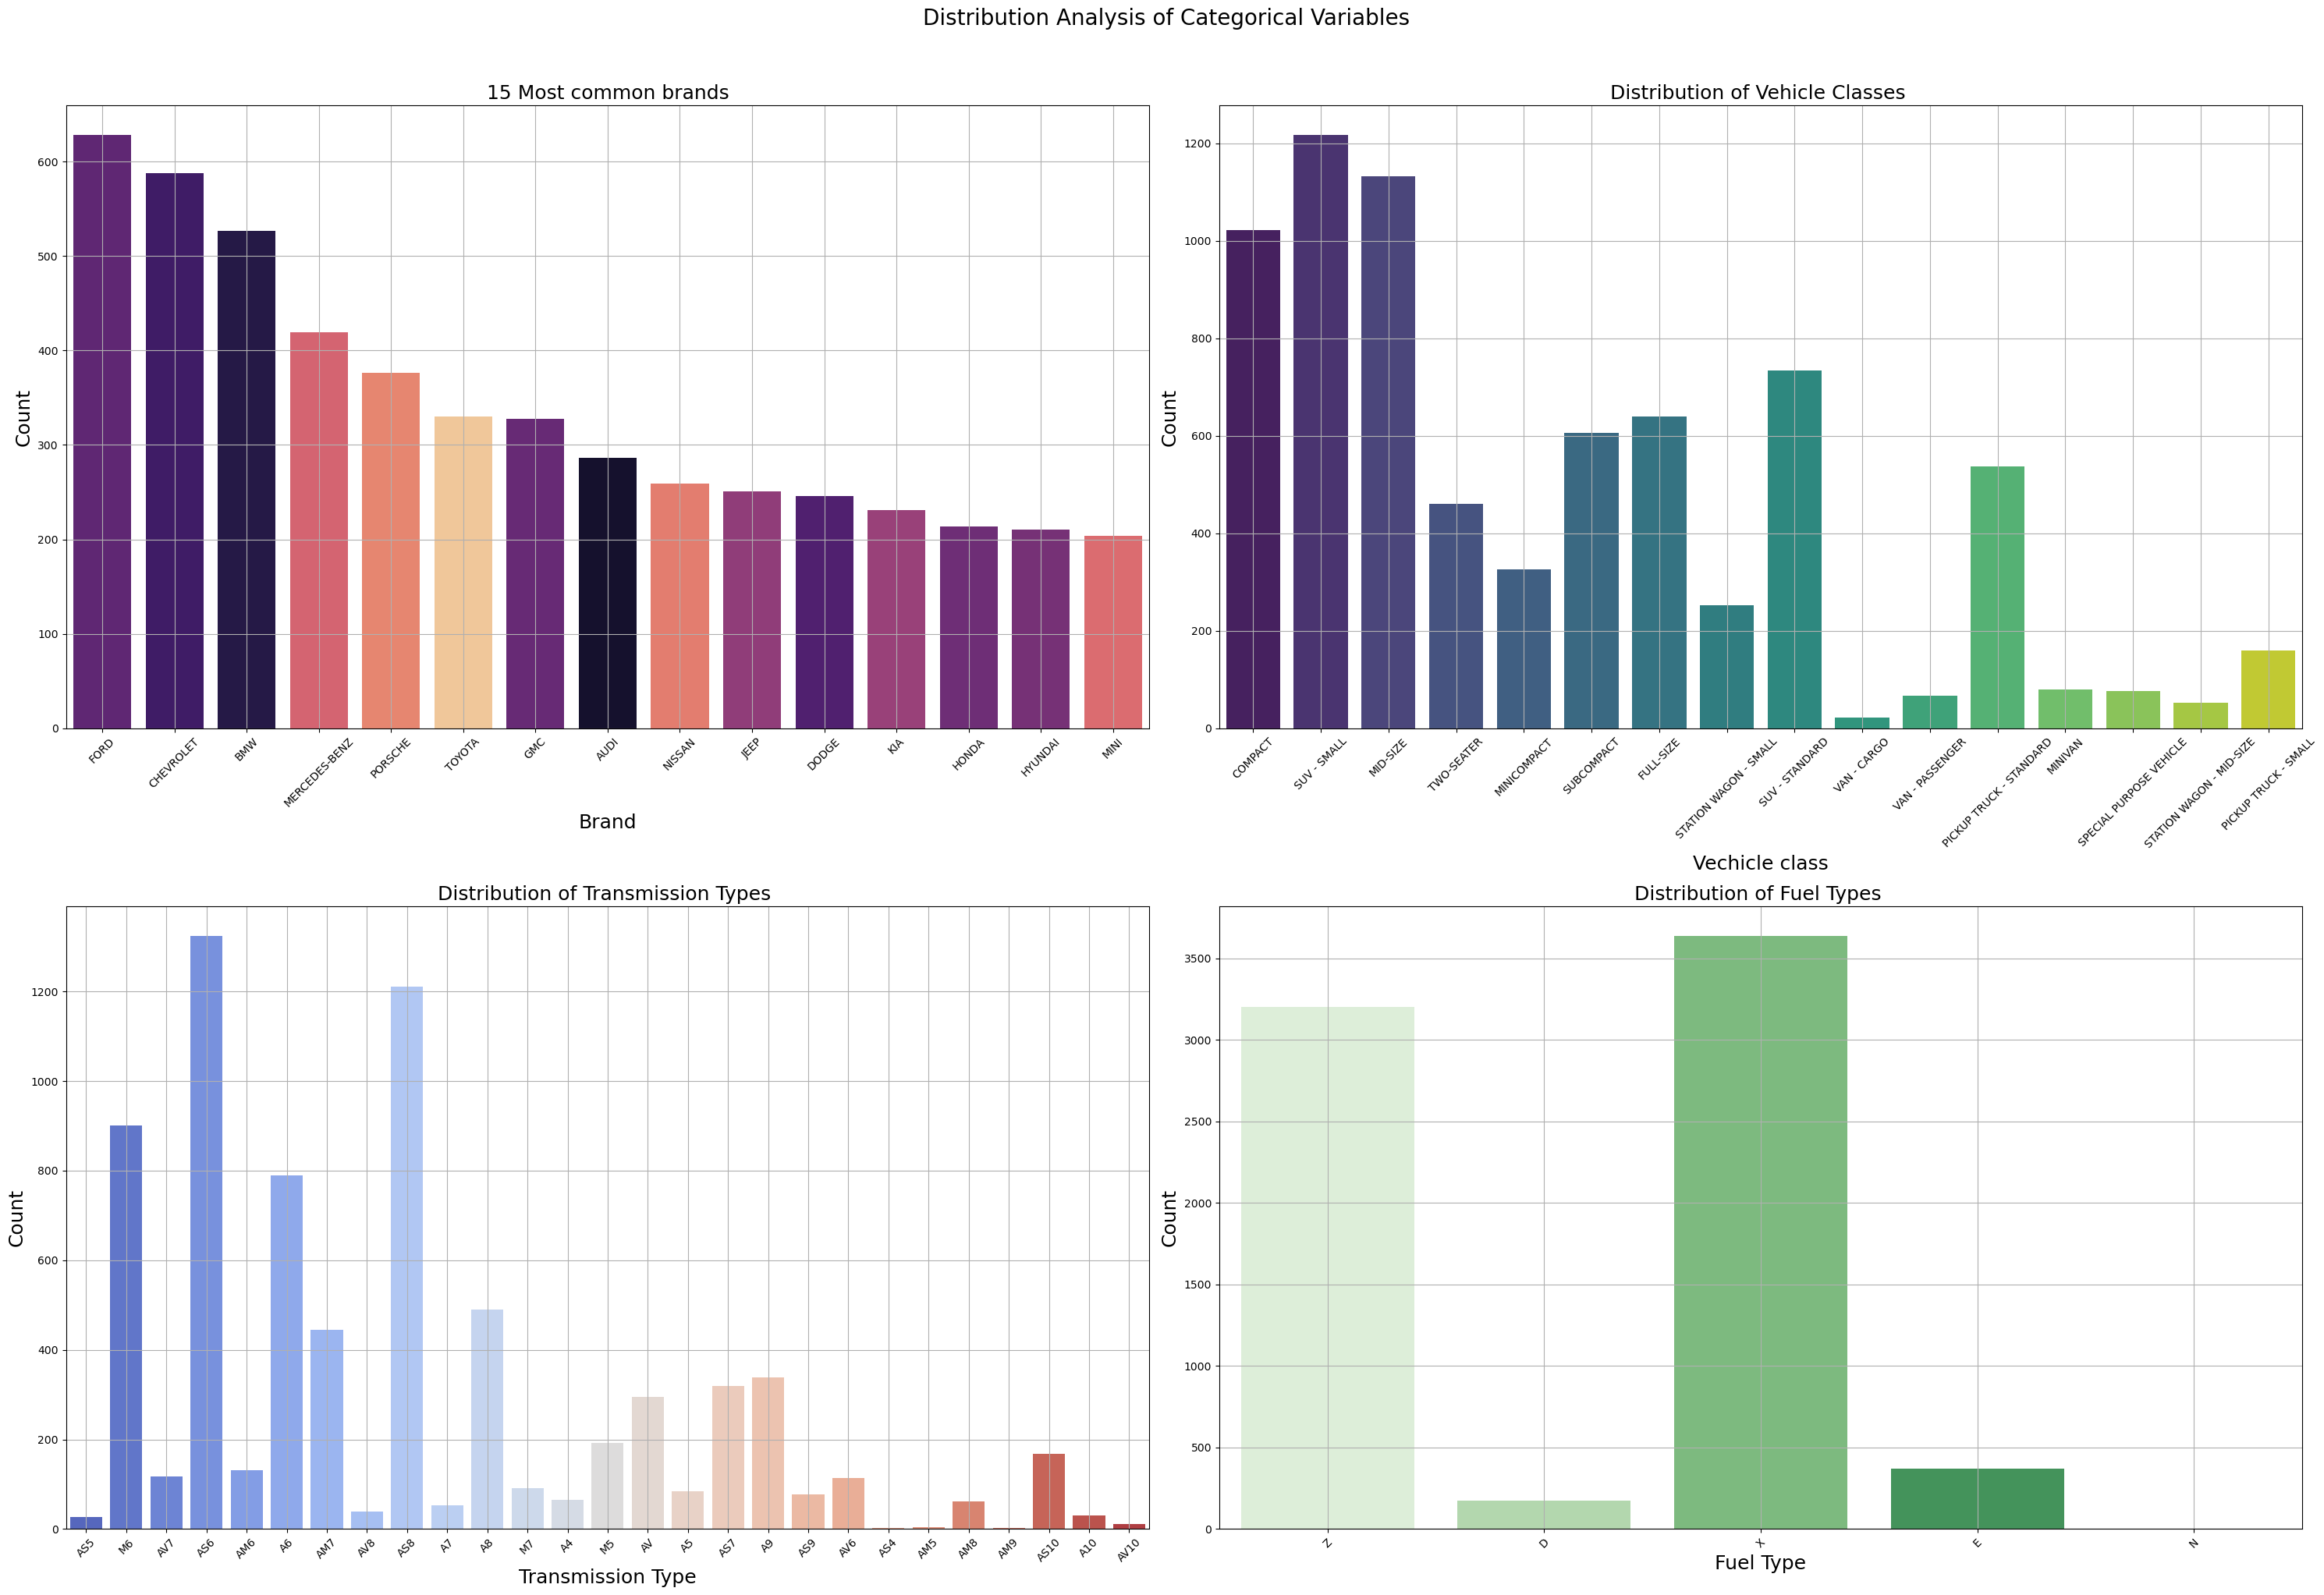

In [17]:
fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(30,20))
sns.countplot(data=car,x='make',order=car['make'].value_counts().iloc[:15].index,ax=axes[0,0],palette='magma',hue='make')
axes[0,0].set_title('15 Most common brands',fontsize=18)
axes[0,0].set_xlabel('Brand',fontsize=18)
axes[0,0].set_ylabel('Count',fontsize=18)
axes[0,0].tick_params(axis='x',rotation=45)
axes[0,0].grid(True)


sns.countplot(data=car,x='vehicle_class',ax=axes[0,1],palette='viridis',hue='vehicle_class')
axes[0,1].set_title('Distribution of Vehicle Classes ',fontsize=18)
axes[0,1].set_xlabel('Vechicle class',fontsize=18)
axes[0,1].set_ylabel('Count',fontsize=18)
axes[0,1].tick_params(axis='x',rotation=45)
axes[0,1].grid(True)

sns.countplot(data=car,x='transmission',ax=axes[1,0],palette='coolwarm',hue='transmission')
axes[1,0].set_title('Distribution of Transmission Types ',fontsize=18)
axes[1,0].set_xlabel('Transmission Type',fontsize=18)
axes[1,0].set_ylabel('Count',fontsize=18)
axes[1,0].tick_params(axis='x',rotation=45)
axes[1,0].grid(True)

sns.countplot(data=car,x='fuel_type',ax=axes[1,1],palette='Greens',hue='fuel_type')
axes[1,1].set_title('Distribution of Fuel Types ',fontsize=18)
axes[1,1].set_xlabel('Fuel Type',fontsize=18)
axes[1,1].set_ylabel('Count',fontsize=18)
axes[1,1].tick_params(axis='x',rotation=45)
axes[1,1].grid(True)

plt.suptitle('Distribution Analysis of Categorical Variables',fontsize=20,y=1.02)
plt.tight_layout()
plt.show()



## Correlation Between Numerical Variables

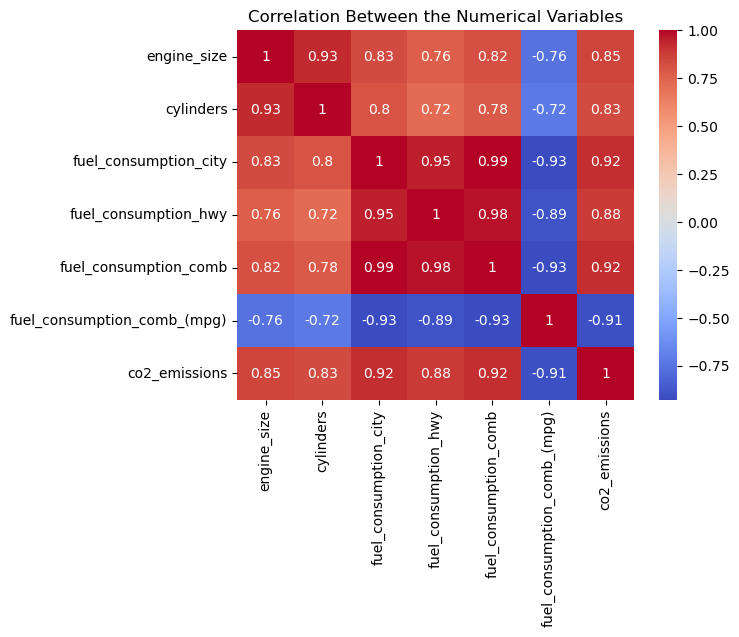

In [21]:
sns.heatmap(car.drop(['make','vehicle_class','model','transmission','fuel_type'],axis=1).corr(),cmap='coolwarm',annot=True)
plt.title('Correlation Between the Numerical Variables')
plt.show()

### Engine Size vs CO2 Emissions

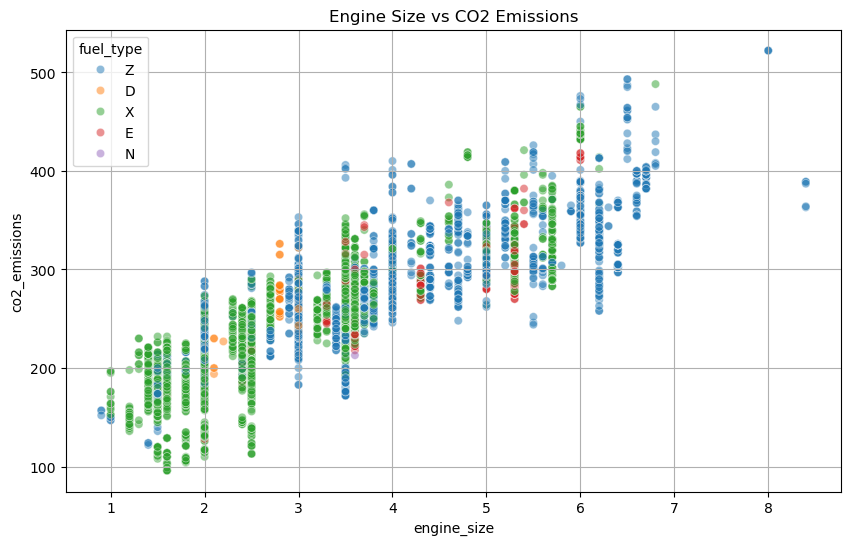

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(car,x='engine_size',y='co2_emissions',hue='fuel_type',alpha=0.5)
plt.grid(True)
plt.title('Engine Size vs CO2 Emissions')
plt.show()

### Boxplots of City/Highway/Combined Fuel Consumption Distributions

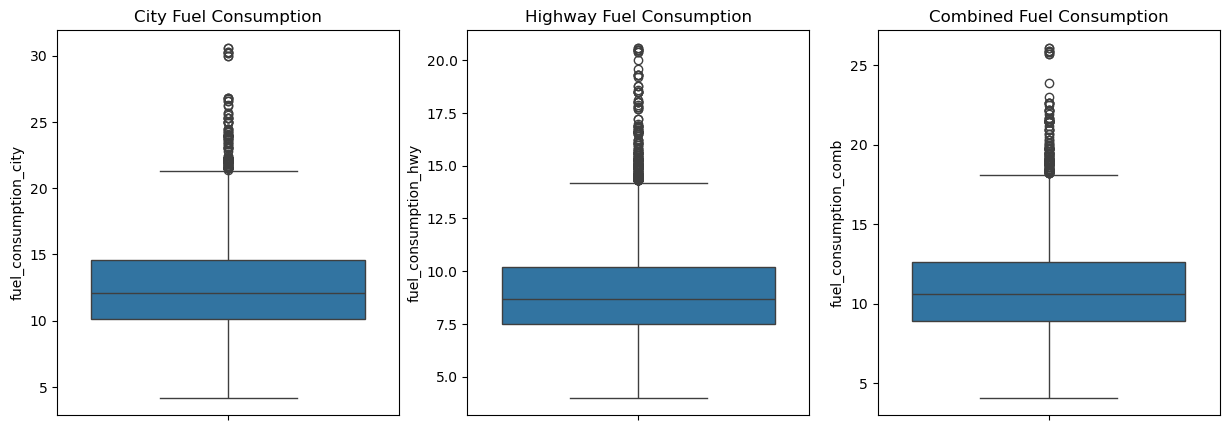

<Figure size 640x480 with 0 Axes>

In [25]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=car,y='fuel_consumption_city',ax=axes[0])
axes[0].set_title('City Fuel Consumption')

sns.boxplot(data=car,y='fuel_consumption_hwy',ax=axes[1])
axes[1].set_title('Highway Fuel Consumption')

sns.boxplot(data=car,y='fuel_consumption_comb',ax=axes[2])
axes[2].set_title('Combined Fuel Consumption')

plt.show()
plt.tight_layout()

### CO2 Emissions by Vehicle Class

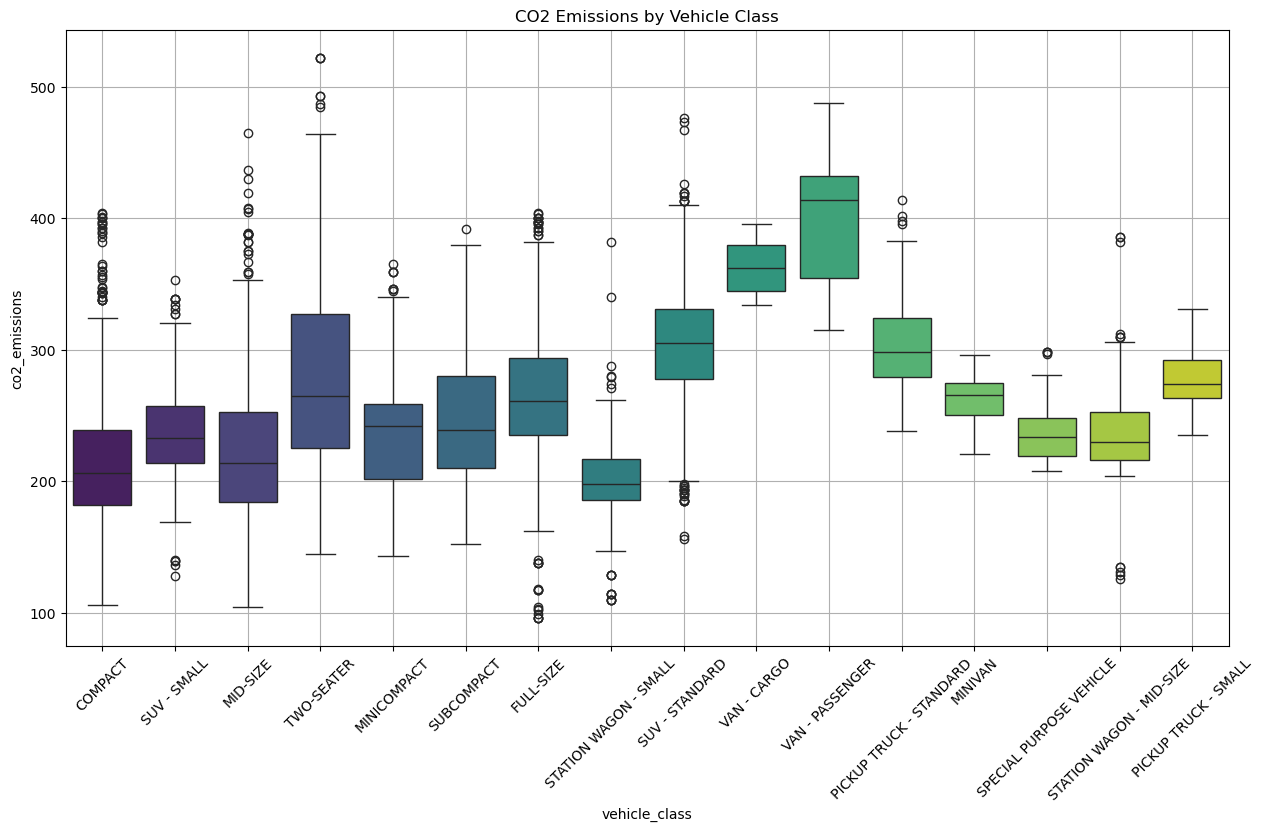

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(car,x='vehicle_class',y='co2_emissions',palette='viridis',hue='vehicle_class')
plt.xticks(rotation=45)
plt.title('CO2 Emissions by Vehicle Class')
plt.grid(True)
plt.show()

### CO2 Emissions by Number of Cylinders

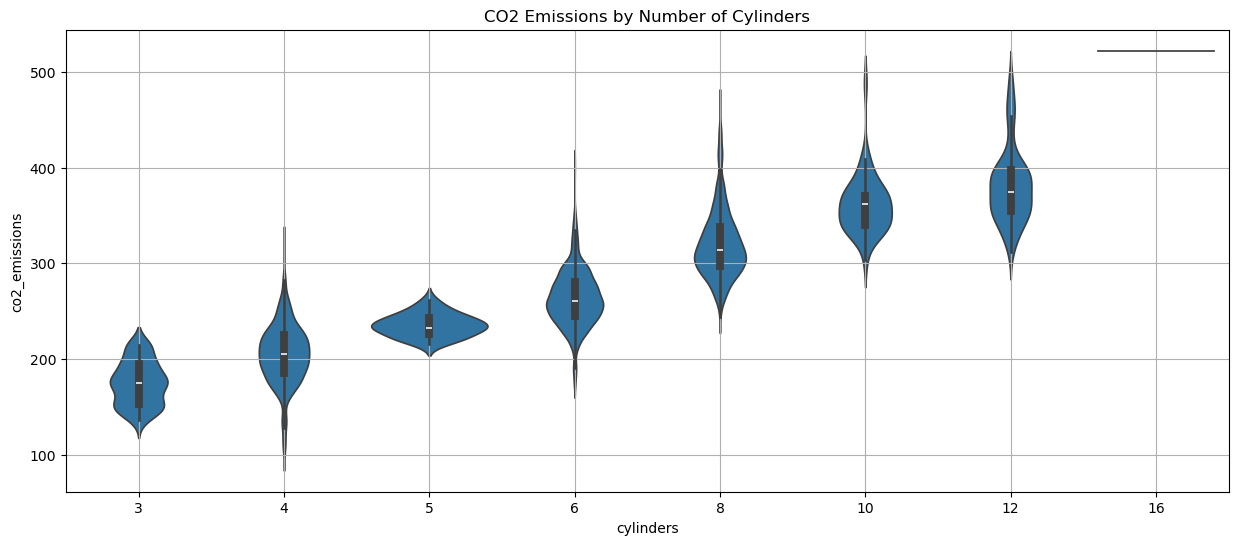

In [29]:
plt.figure(figsize=(15,6))
sns.violinplot(car,x='cylinders',y='co2_emissions')
plt.title('CO2 Emissions by Number of Cylinders')
plt.grid(True)
plt.show()

### Average CO2 Emissions by Top 15 Manufacturers

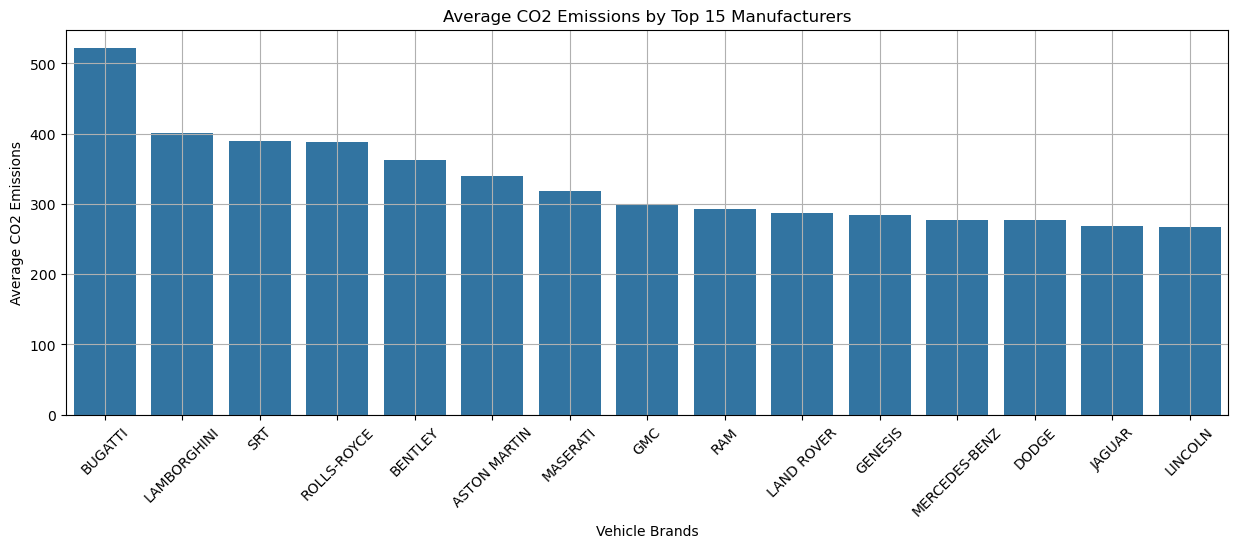

In [31]:
plt.figure(figsize=(15,5))
avg_make=car.groupby('make')['co2_emissions'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_make.index,y=avg_make.values)
plt.xticks(rotation=45)
plt.grid(True)
plt.title('Average CO2 Emissions by Top 15 Manufacturers')
plt.xlabel('Vehicle Brands')
plt.ylabel('Average CO2 Emissions')
plt.show()

# Preprocessing

In [33]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         7385 non-null   object 
 1   model                        7385 non-null   object 
 2   vehicle_class                7385 non-null   object 
 3   engine_size                  7385 non-null   float64
 4   cylinders                    7385 non-null   int64  
 5   transmission                 7385 non-null   object 
 6   fuel_type                    7385 non-null   object 
 7   fuel_consumption_city        7385 non-null   float64
 8   fuel_consumption_hwy         7385 non-null   float64
 9   fuel_consumption_comb        7385 non-null   float64
 10  fuel_consumption_comb_(mpg)  7385 non-null   int64  
 11  co2_emissions                7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


## Label Encoding

In [35]:
columns_encode=['make','model','vehicle_class','transmission','fuel_type']
label_encode={}

for col in columns_encode:
    le=LabelEncoder()
    car[col]=le.fit_transform(car[col])
    label_encode[col]=le

In [37]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         7385 non-null   int32  
 1   model                        7385 non-null   int32  
 2   vehicle_class                7385 non-null   int32  
 3   engine_size                  7385 non-null   float64
 4   cylinders                    7385 non-null   int64  
 5   transmission                 7385 non-null   int32  
 6   fuel_type                    7385 non-null   int32  
 7   fuel_consumption_city        7385 non-null   float64
 8   fuel_consumption_hwy         7385 non-null   float64
 9   fuel_consumption_comb        7385 non-null   float64
 10  fuel_consumption_comb_(mpg)  7385 non-null   int64  
 11  co2_emissions                7385 non-null   int64  
dtypes: float64(4), int32(5), int64(3)
memory usage: 548.2 KB


In [39]:
car.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_(mpg),co2_emissions
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


## Training and Testing Data

In [41]:
X=car.drop('co2_emissions',axis=1)
y=car['co2_emissions']

In [43]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.75, random_state=42)

## Scaling

In [45]:
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

## Training the Model

In [47]:
randf=RandomForestClassifier(n_estimators=600)
randf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predicting Test Data

In [49]:
pred_r=randf.predict(X_test)

## Evaluating the Model

In [57]:
print('Mean Absolute Error (MAE)',metrics.mean_absolute_error(y_test,pred_r))
print('Mean Squared Error (MSE):',metrics.mean_squared_error(y_test,pred_r))
print('R-squared Score (R²): ',np.sqrt(metrics.root_mean_squared_error(y_test,pred_r)))

Mean Absolute Error (MAE) 3.2258530420653546
Mean Squared Error (MSE): 63.820545224769816
R-squared Score (R²):  2.826442322637629


# Visualization of the Model's Results

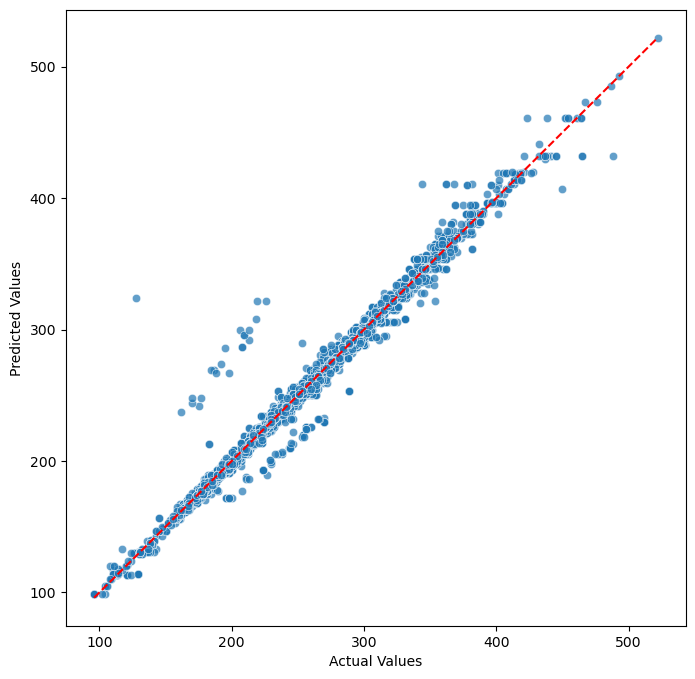

In [59]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test,y=pred_r,alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

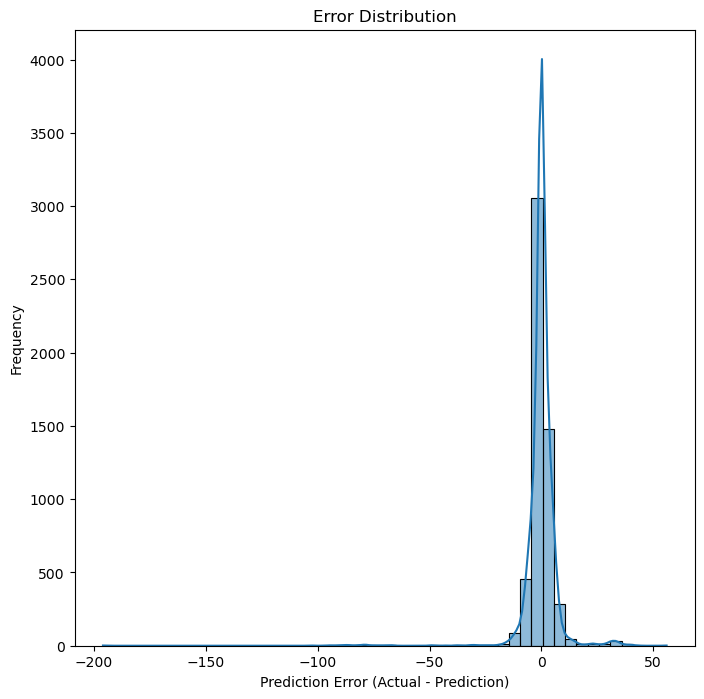

In [61]:
plt.figure(figsize=(8,8))
sns.histplot(y_test-pred_r,kde=True,bins=50)
plt.xlabel("Prediction Error (Actual - Prediction)")
plt.ylabel("Frequency")
plt.title('Error Distribution')
plt.show()